# 第六章 经验贝叶斯

## 汽车索赔的例子——rubbin分数

In [1]:
%matplotlib inline

from functools import reduce

import numpy as np
import pandas as pd
import seaborn as sb
from scipy.optimize import minimize
from scipy.special import gamma, factorial
 
sb.set_style("whitegrid")

输入数据：

<AxesSubplot:xlabel='x', ylabel='y'>

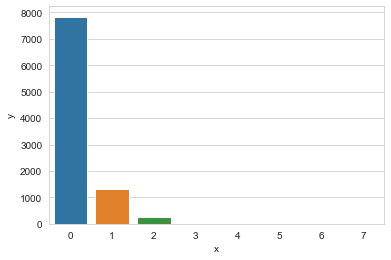

In [2]:
y = np.array([7840, 1317, 239, 42, 14, 4, 4, 1])
df = pd.DataFrame(
    {
        "x": list(range(8)),
        "y": y
    }
)
sb.barplot(data=df, x="x", y="y")

计算分数：

In [3]:
def rubbin_e(x, y_x, y_x_1):
    """rubbin分数
    """
    return (x + 1) * y_x_1 / y_x 


df["y_1"] = list(df["y"][1:]) + [0]
df['rubbin_e'] = df.apply(
    lambda row: rubbin_e(row['x'], row['y'], row['y_1']),
    axis=1
)
df

,x,y,y_1,rubbin_e
0,0,7840,1317,0.167985
1,1,1317,239,0.362946
2,2,239,42,0.527197
3,3,42,14,1.333333
4,4,14,4,1.428571
5,5,4,4,6.000000
6,6,4,1,1.750000
7,7,1,0,0.000000


Gamma分布评估：

!!!!待修改

In [4]:
def f(x):
    def helper(params):
        nu, sigma = params
        g = sigma / (1 + sigma)
        return g ** (nu + x) * gamma(nu + x) / sigma ** nu / gamma(nu) / factorial(x)
    return helper

mle_gamma_list = df.apply(
    lambda row: lambda params: - np.log(f(row['x'])(params)) * row['y'],
    axis=1
    ).tolist()

mle_gamma_func = reduce(
    lambda f1, f2: lambda params: f1(params) + f2(params),
    mle_gamma_list)
res = minimize(
    mle_gamma_func,
    x0=(78, 0.2),
    # method='BFGS',
    # options={'maxiter': 1000000},
    options={'disp': True},
    bounds= (
        (0, None),
        (0, None)
    ))
params = res.x
params

df['y_hat'] = df['x'].apply(
    lambda x: f(x)(params)* df['y'].sum()
    )
df['y_hat_1'] = df['y_hat'][1:].tolist() + [0.]
df['gamma_mle'] = df['x'] * df['y_hat_1'] / df['y_hat']
df

D:\ProgramData\Anaconda3\envs\stats\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,x,y,y_1,rubbin_e,y_hat,y_hat_1,gamma_mle
0,0,7840,1317,0.167985,0.006307,0.081987,0.000000
1,1,1317,239,0.362946,0.081987,0.539746,6.583333
2,2,239,42,0.527197,0.539746,2.398869,8.888889
3,3,42,14,1.333333,2.398869,8.096183,10.125000
4,4,14,4,1.428571,8.096183,22.129566,10.933333
5,5,4,4,6.000000,22.129566,51.020945,11.527778
6,6,4,1,1.750000,51.020945,102.041890,12.000000
7,7,1,0,0.000000,102.041890,0.000000,0.000000
